## Imports

In [1]:
import data

import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
doodle_map, X, y = data.auto_load(size=25000, categories=[
    'soccer ball', 'The Great Wall of China', 'hamburger', 'moon', 'saxophone', 'bench', 'pizza', 'cactus', 'sun', 'shovel', 'The Mona Lisa', 'wristwatch', 'microphone', 'cow', 'cannon', 'yoga', 'drill', 'frog', 'snail', 'scorpion', 'campfire', 'sea turtle', 'paintbrush', 'strawberry', 'grapes', 'sword', 'roller coaster', 'pencil', 'carrot', 'train', 'toothpaste', 'broccoli', 'face', 'hockey stick', 'bracelet', 'marker', 'scissors', 'umbrella', 'envelope', 'wheel', 'garden hose', 'kangaroo', 'onion', 'submarine', 'hot tub', 'tennis racquet', 'palm tree', 'zebra', 'moustache', 'school bus', 'door', 'book', 'lollipop', 'sink', 'barn', 'nail', 'fork', 'bathtub', 'animal migration', 'watermelon', 'passport', 'mug', 'dumbbell', 'hot dog', 'beard', 'flamingo', 'bird', 'hand', 'firetruck', 'hourglass', 'whale', 'pig', 'clock', 'fish', 'ice cream', 'diamond', 'wine glass', 'mailbox', 'pool', 'popsicle', 'toaster', 'crown', 'pond', 'airplane', 'computer', 'megaphone', 'hot air balloon', 'flying saucer', 'ladder', 'ear', 'mushroom', 'piano', 'wine bottle', 'lobster', 'horse', 'pickup truck', 'peanut', 'blueberry', 'mermaid', 'purse'
])

In [3]:
doodle_map

['airplane',
 'animal migration',
 'barn',
 'bathtub',
 'beard',
 'bench',
 'bird',
 'blueberry',
 'book',
 'bracelet',
 'broccoli',
 'cactus',
 'campfire',
 'cannon',
 'carrot',
 'clock',
 'computer',
 'cow',
 'crown',
 'diamond',
 'door',
 'drill',
 'dumbbell',
 'ear',
 'envelope',
 'face',
 'firetruck',
 'fish',
 'flamingo',
 'flying saucer',
 'fork',
 'frog',
 'garden hose',
 'grapes',
 'hamburger',
 'hand',
 'hockey stick',
 'horse',
 'hot air balloon',
 'hot dog',
 'hot tub',
 'hourglass',
 'ice cream',
 'kangaroo',
 'ladder',
 'lobster',
 'lollipop',
 'mailbox',
 'marker',
 'megaphone',
 'mermaid',
 'microphone',
 'moon',
 'moustache',
 'mug',
 'mushroom',
 'nail',
 'onion',
 'paintbrush',
 'palm tree',
 'passport',
 'peanut',
 'pencil',
 'piano',
 'pickup truck',
 'pig',
 'pizza',
 'pond',
 'pool',
 'popsicle',
 'purse',
 'roller coaster',
 'saxophone',
 'school bus',
 'scissors',
 'scorpion',
 'sea turtle',
 'shovel',
 'sink',
 'snail',
 'soccer ball',
 'strawberry',
 'submari

## Feature Scaling

In [4]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

## Unflatten Array (for convolutional neural network)
Convert 1D array to 2D array

In [5]:
X = X.reshape(-1, 28, 28, 1)

## OneHotEncoding

In [6]:
y = utils.to_categorical(y, len(doodle_map))

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

### Create Neural Network

In [8]:
# Create a sequential model
model = models.Sequential()

# Add Input Layer
model.add(layers.Conv2D(32, kernel_size=5, activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# Add Hidden Layers
model.add(layers.Conv2D(64, kernel_size=5, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dense(1000, activation="relu"))

# Add Output Layer
model.add(layers.Dense(len(doodle_map), activation="softmax"))

# Compile
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=2500)

Train on 2000000 samples, validate on 500000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
2000000/2000000 [==============================] - 370s 185us/sample - loss: 1.5143 - acc: 0.6214 - val_loss: 1.1161 - val_acc: 0.7141
Epoch 2/5
2000000/2000000 [==============================] - 273s 137us/sample - loss: 1.0085 - acc: 0.7406 - val_loss: 0.9614 - val_acc: 0.7520
Epoch 3/5
2000000/2000000 [==============================] - 272s 136us/sample - loss: 0.8934 - acc: 0.7682 - val_loss: 0.8975 - val_acc: 0.7680
Epoch 4/5
2000000/2000000 [==============================] - 272s 136us/sample - loss: 0.8240 - acc: 0.7847 - val_loss: 0.8581 - val_acc: 0.7774
Epoch 5/5
2000000/2000000 [==============================] - 272s 136us/sample - loss: 0.7764 - acc: 0.7962 - val_loss: 0.8300 - val_acc: 0.7852


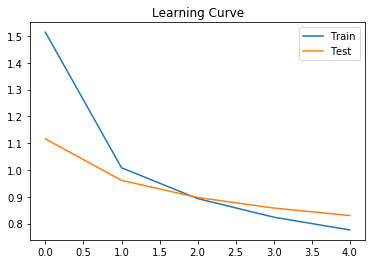

In [10]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Learning Curve')
plt.legend()
plt.show()

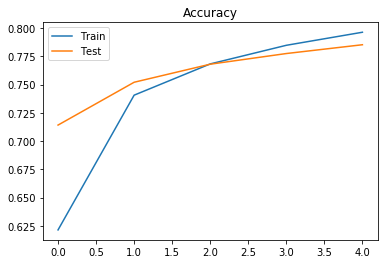

In [11]:
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.legend()
plt.show()

In [12]:
model.save('my_model.h5')